**Projet MACS 205 : Climate Change**

réalisé par:


* Albane Arifon
* Antoine montaigu
* Pierre Monroux
* Raed Rokh
* Thomas Lucereau





L'objectif est de vérifier (numériquement) les résultats donnés, dans une simulation de la variation de température pour les années à venir.

Pour ce faire, nous suivrons l'évolution de différentes variables au cours du temps :

Nous pouvons écrire :

$$
y(t) = \begin{bmatrix}
y_1(t) \\
y_2(t) \\
y_3(t) \\
y_4(t) \\
y_5(t) \\
y_6(t) \\
y_7(t) \\
y_8(t)
\end{bmatrix} = \begin{bmatrix}
Atmosphere(t) \\
CarbonateRock(t) \\
DeepOcean(t) \\
FossilFuelCarbon(t) \\
Plants(t) \\
Soils(t) \\
SurfaceOcean(t) \\
VegLandArea(t)
\end{bmatrix} \in \mathbb{R}^8
$$

Avec les conditions initiales :

$$
y(0) = \begin{bmatrix}
y_1(0) \\
y_2(0) \\
y_3(0) \\
y_4(0) \\
y_5(0) \\
y_6(0) \\
y_7(0) \\
y_8(0)
\end{bmatrix} = \begin{bmatrix}
Atmosphere\_Initial \\
CarbonateRock\_Initial \\
DeepOcean\_Initial \\
FossilFuelCarbon\_Initial \\
Plants\_Initial \\
Soils\_Initial \\
SurfaceOcean\_Initial \\
VegLandArea\_Initial
\end{bmatrix} = \begin{bmatrix}
750 \\
100000000 \\
38000 \\
7500 \\
560 \\
1500 \\
890 \\
100
\end{bmatrix}
$$

Nous pouvons écrire l'évolution des variables avec le temps sous la forme d'un problème de Cauchy :

$$
\begin{cases}
y'(t) = f(t, y(t)) & \forall t \in [0, T] \\
y(0) = y_0
\end{cases}
$$

avec $f : \mathbb{R} \times \mathbb{R}^8 \to \mathbb{R}^8$. Son expression exacte peut être calculée grâce au script *carbone.py*, ou bien sur le site [Model equations](https://exchange.iseesystems.com/public/globeprogam/global-carbon-cycle-model-with-feedbacks/index.html#page5).


In [ ]:
# All imports of libraries go here
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [ ]:
# Importing the Python files that we will need
%run carbone.py

<Figure size 640x480 with 0 Axes>

# Méthodes à une étape :


## Méthode d'Euler

Nous allons implémenter ici une méthode d'Euler explicite simple. La séquence que nous allons obtenir est la suivante :

$$
y_{n + 1} = y_n + h_n f(y_n, t_n)
$$

pour $n \in \{0, \dots, N \}$, où $t_N = t_0 + T$.


In [ ]:
def Euler(x0, t0, tN, f, N):

    t = np.linspace(t0, tN, N + 1)

    # Defining the steps h
    h = t[1:] - t[:-1]

    # Computing the values of y and storing them
    d = len(x0)
    y = np.zeros((N + 1, d))
    y[0] = x0
    for i in range(N):
        y[i + 1] = y[i] + h[i] * f(y[i], t[i])
    return y


### Visualization

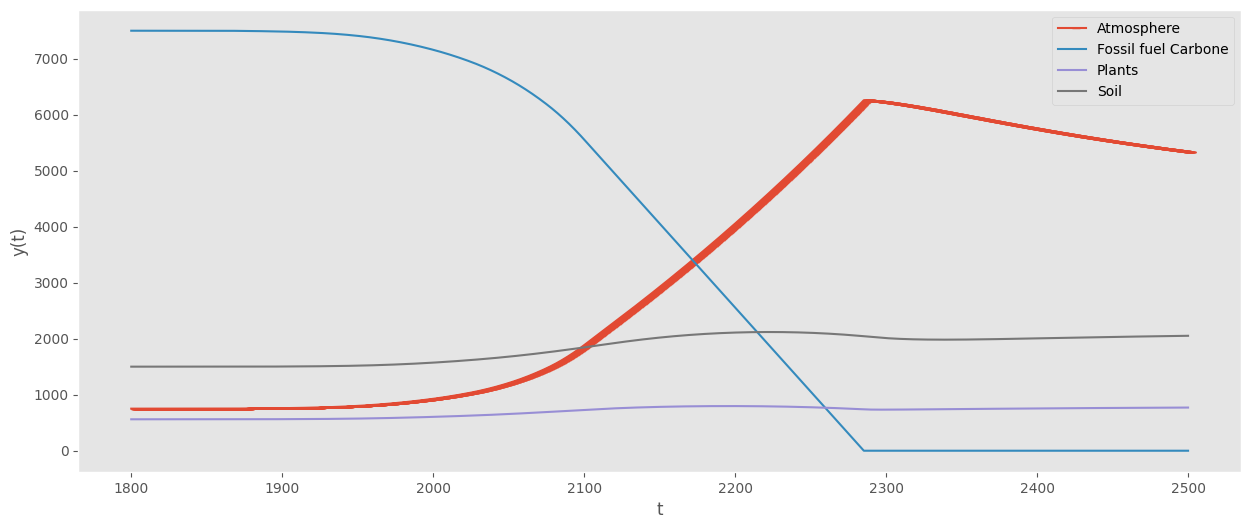

In [ ]:
# Parameters
t0 = 1800
tN = 2500
N = 5000
# Computation
t = np.linspace(t0, tN, N + 1)
y = Euler(x0, t0, tN, derivative, N)
# Plotting
plt.figure(figsize = (15, 6))
plt.plot(t, y[:, 0], marker = 1, label = "Atmosphere")
plt.plot(t, y[:, 3], label = "Fossil fuel Carbone")
plt.plot(t, y[:, 4], label = "Plants")
plt.plot(t, y[:, 5], label = "Soil")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()


## Méthodes de Runge-Kutta avec $q = 2$

Ci-dessous, nous avons implémenté deux méthodes de Runge-Kutta avec $q = 2$. Leurs tableaux de Butcher sont les suivants :

- Première méthode : (Méthode du point milieu)

$$
\begin{array}{c|cc}
0 & 0 & 0 \\
1/2 & 1/2 & 0 \\
\hline
& 0 & 1
\end{array}
$$

- Deuxième méthode : (Méthode de Heun)

$$
\begin{array}{c|cc}
0 & 0 & 0 \\
1 & 1 & 0 \\
\hline
& 1/2 & 1/2
\end{array}
$$


In [ ]:
def heun(z0 , f , t0,tN, N):
    '''
    This function implements Runge-Kutta 2nd order method

    z0: initial value
    f: function
    t0: initial time
    tN: final time
    N: number of steps

    Returns: array of values of z
    '''
    # Defining the steps
    t = np.linspace(t0, tN, N + 1)
    z = np.zeros((len(t), 8))
    z[0] = z0

    for i in range(len(t)-1):

        # Defining the steps
        dt = t[i+1] - t[i]

        k1 = f(z[i] , t[i])
        k2 = f(z[i] + dt*k1 , t[i] + dt )

        z[i+1] = z[i] + dt*(k1 + k2)/2

    return z

def midpoint(z0 , f , t0,tN, N):
    '''
    This function implements Runge-Kutta 2nd order method

    z0: initial value
    f: function
    t0: initial time
    tN: final time
    N: number of steps

    Returns: array of values of z
    '''
    # Defining the steps
    t = np.linspace(t0, tN, N + 1)
    z = np.zeros((len(t), 8))
    z[0] = z0

    for i in range(len(t)-1):

        # Defining the steps
        dt = t[i+1] - t[i]

        k1 = f(z[i] , t[i])
        k2 = f(z[i] + dt*k1/2 , t[i] + dt/2 )

        z[i+1] = z[i] + dt*k2

    return z

## Méthode de Runge-Kutta avec $q = 4$

Ci-dessous, nous avons implémenté la méthode de Runge-Kutta avec $q = 4$. Son tableau de Butcher est le suivant :

$$
\begin{array}{c|cccc}
0 & 0 & 0 & 0 & 0 \\
1/2 & 1/2 & 0 & 0 & 0 \\
1/2 & 0 & 1/2 & 0 & 0 \\
1 & 0 & 0 & 1 & 0 \\
\hline
& 1/6 & 1/3 & 1/3 & 1/6
\end{array}
$$


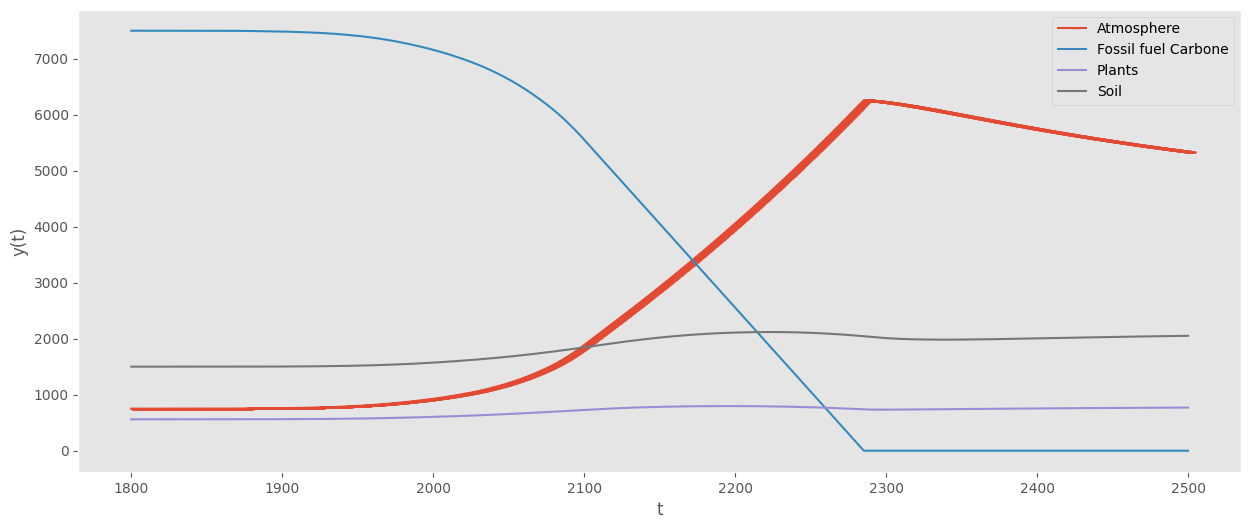

In [ ]:
def rk4(z0 , f, t0,tN, N):
    '''
    This function implements Runge-Kutta 4th order method

    z0: initial value
    f: function
    t0: initial time
    tN: final time
    N: number of steps

    Returns: array of values of z
    '''
    # Defining the steps
    t = np.linspace(t0, tN, N + 1)
    z = np.zeros((len(t), 8))
    z[0] = z0

    for i in range(len(t)-1):

        # Defining the steps
        dt = t[i+1] - t[i]

        k1 = f(z[i] , t[i])
        k2 = f(z[i] + dt*k1/2 , t[i] + dt/2 )
        k3 = f( z[i] + dt*k2/2 , t[i] + dt/2 )
        k4 = f( z[i] + dt*k3 , t[i] + dt )


        z[i+1] = z[i] + dt*(k1 + 2*k2 + 2*k3 + k4)/6

    return z

y = rk4(x0, derivative,  t0, tN, N)

# Plotting
plt.figure(figsize = (15, 6))
plt.plot(t, y[:, 0], marker = 1, label = "Atmosphere")
#plt.plot(t, y[:, 2], label = "Deep Ocean")
plt.plot(t, y[:, 3], label = "Fossil fuel Carbone")
plt.plot(t, y[:, 4], label = "Plants")
plt.plot(t, y[:, 5], label = "Soil")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()


## Implémentation générale de la méthode de Runge-Kutta :

Elle prend en entrée le tableau de Butcher $(c, a, b)$ de la méthode et renvoie la séquence des approximations de la solution du problème de Cauchy.


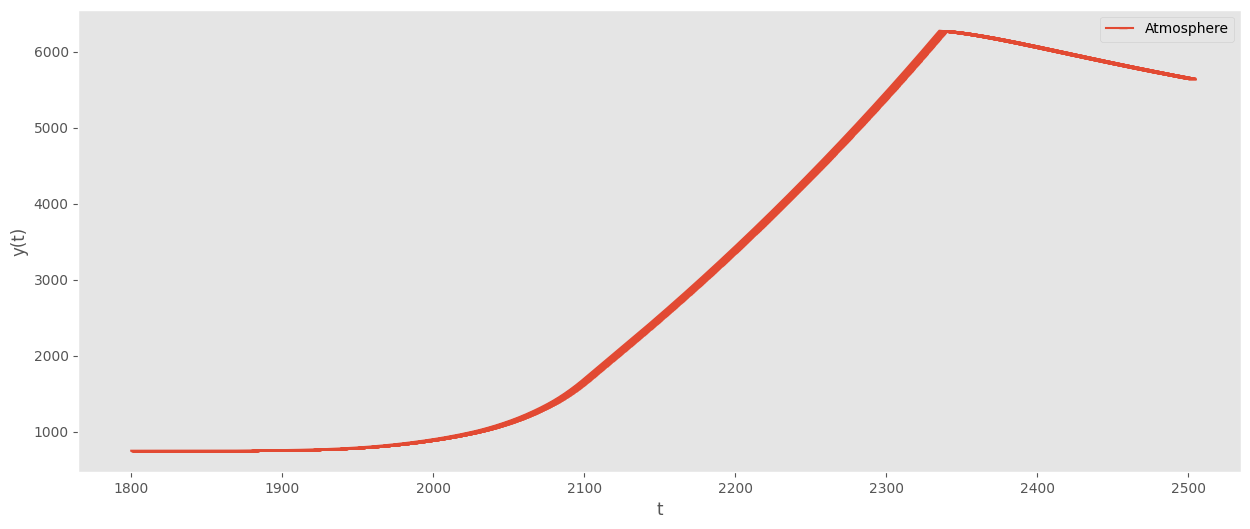

In [ ]:
# General Runge-Kutta
def Runge_Kutta(y0, t0, tN, f, N, c, a, b):
    '''
    This function implements Runge-Kutta method for any order
    y0: initial value
    t0: initial time
    tN: final time
    f: function
    N: number of steps
    c:
    a:
    b:
    returns: y
    '''


    q = len(b)
    d = len(y0)

    # defining the matrix Y and y and p and t
    y = np.zeros((N + 1, d))
    p = np.zeros((q, d))
    t = np.linspace(t0, tN, N + 1)
    T = np.zeros(q)
    h = t[1:] - t[:-1]

    # initilizing
    y[0] = y0


    # computing the values
    for n in range(N):
        for i in range(1,q):
            p[i] = f( y[n] + h[n] * (a[i] @ p), t[n] + c[i - 1] * h[n])
        y[n + 1] = y[n] + h[n] * (b @ p)
    return y

# Testing the function

t0 = 1800
tN = 2500
N = 10000
c = np.array([0, 0.5, 0.5, 1])
b = np.array([1/6, 2/6, 2/6, 1/6])
a = np.array([[0, 0, 0, 0],
             [0.5, 0, 0, 0],
             [0, 0.5, 0, 0],
             [0, 0, 1, 0]])
y = Runge_Kutta(x0, t0, tN, derivative, N, c, a, b)
t = np.linspace(t0, tN, N + 1)
# Plotting
plt.figure(figsize = (15, 6))
plt.plot(t, y[:, 0], marker = 1, label = "Atmosphere")

plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()

# Test secondaire : Une méthode à deux étapes

Nous pouvons également utiliser la méthode d'Adams-Bashforth, simplement pour la comparer avec nos méthodes à une étape.


In [ ]:
def adams_bashforth(y0, t0, tN, f, N):
    '''
    This function implements Adams-Bashforth method
    y0: initial value
    t0: initial time
    tN: final time
    f: function
    N: number of steps
    returns: y
    '''
    # Defining the steps
    t = np.linspace(t0, tN, N + 1)
    h = t[1:] - t[:-1]

    # Defining the matrix Y and y
    d = len(y0)
    y = np.zeros((N + 1, d))
    Y = np.zeros((3, d))

    # Initializing
    y[0] = y0
    Y[0] = y0
    Y[1] = y0 + h[0] * f(y0, t0)
    Y[2] = y0 + h[0] * f(Y[1], t0 + h[0])

    # Computing the values
    for n in range(3, N):
        y[n + 1] = Y[2] + h[n] * (23 * f(Y[2], t[n]) - 16 * f(Y[1], t[n - 1]) + 5 * f(Y[0], t[n - 2])) / 12
        Y[0] = Y[1]
        Y[1] = Y[2]
        Y[2] = y[n + 1]

    return y

Testing:

(100001, 8)


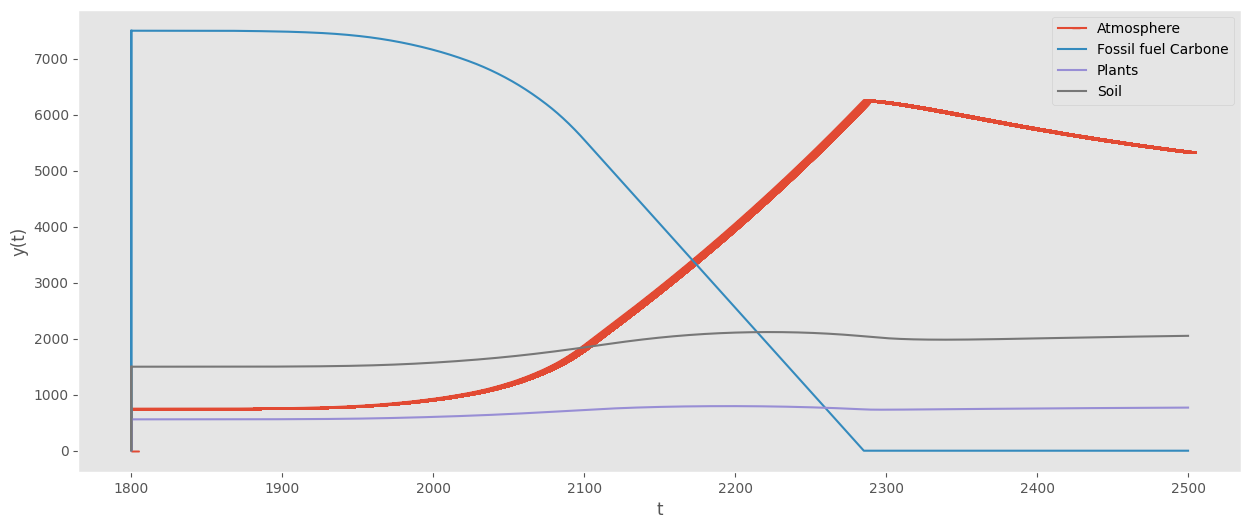

In [ ]:
N= 100000
y = adams_bashforth(x0, t0, tN, derivative ,N)
print(y.shape)

t = np.linspace(t0, tN, N + 1)

# Plotting
plt.figure(figsize = (15, 6))
plt.plot(t, y[:, 0], marker = 1, label = "Atmosphere")
#plt.plot(t, y[:, 2], label = "Deep Ocean")
plt.plot(t, y[:, 3], label = "Fossil fuel Carbone")
plt.plot(t, y[:, 4], label = "Plants")
plt.plot(t, y[:, 5], label = "Soil")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()

## Analyse de l'erreur :

Nous allons tester nos méthodes avec des pas très petits et très grands afin d’évaluer leurs performances.

**Régularité** : si la méthode est Lipschitzienne, elle est stable, mais il est nécessaire de vérifier que la constante de Lipschitz $\Lambda$ n'est pas trop élevée, car nous allons la multiplier par $T = 700$ années, puis calculer son exponentielle.


Nous utilisons ici la méthode RK4 pour générer la vérité terrain de notre solution, que les autres méthodes tenteront d'approximer. Nous utiliserons les mêmes conditions initiales qu'auparavant et évaluerons différentes méthodes sur le même intervalle de temps, avec la même taille de pas.

La norme utilisée ici est la norme $L^2$. Nous comparerons la méthode RK4 avec les méthodes RK2, Heun et Euler.


(1000001, 8)


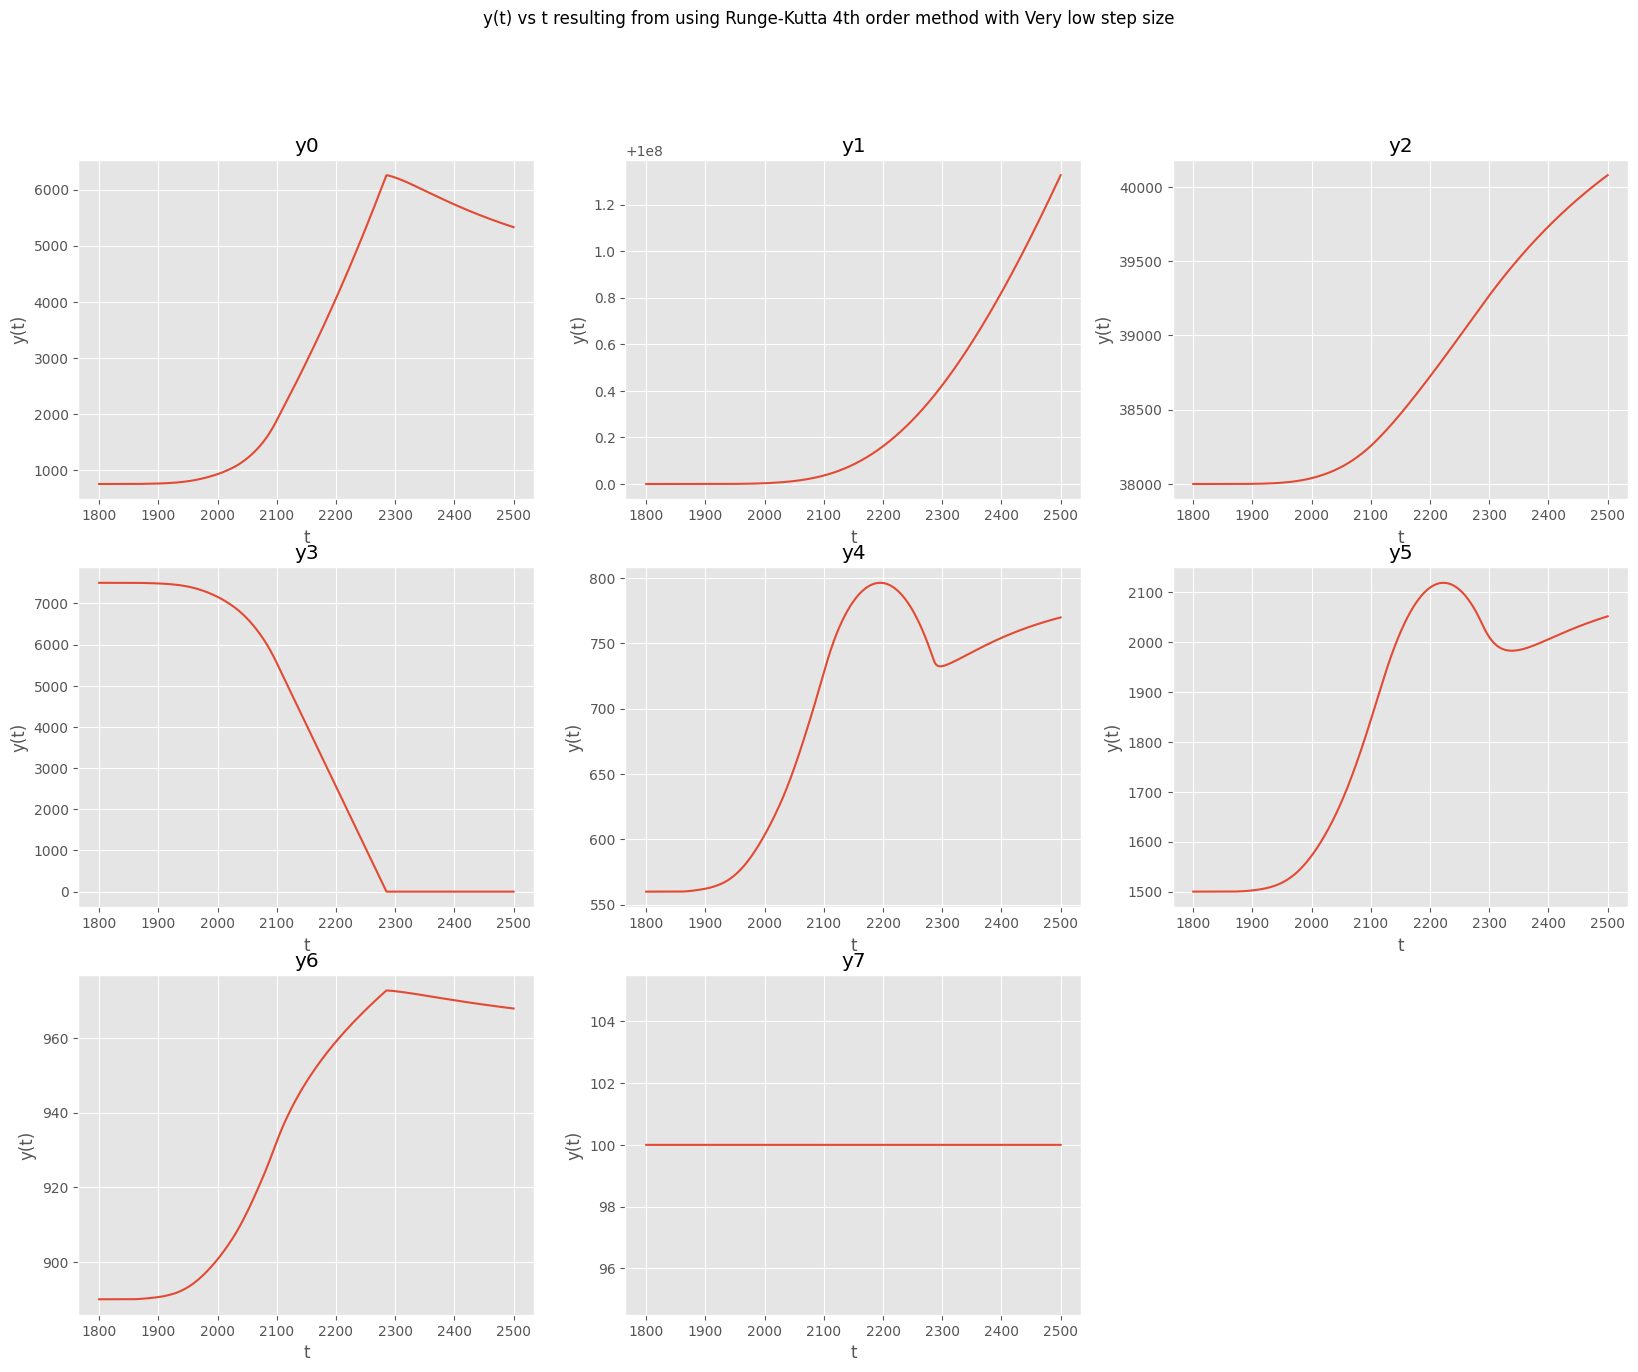

In [ ]:
N= 1000000
y = rk4(x0, derivative, t0, tN, N)
print(y.shape)

t = np.linspace(t0, tN, N + 1)


# Plotting y in 9 subplots
plt.figure(figsize = (20, 15))
plt.suptitle("y(t) vs t resulting from using Runge-Kutta 4th order method with Very low step size")
for i in range(8):
    plt.subplot(3, 3, i + 1)
    plt.plot(t, y[:, i])
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.title("y" + str(i))


Nous considérerons que la valeur calculée par la méthode RK4 avec $N = 1{,}000{,}000$ est la solution exacte. Les graphiques obtenus ici ressemblent à ceux présentés sur les sites web.

Error functions

In [ ]:
def differenceMatrices(smallMatrice, bigMatrice):
    '''
    This function computes the difference between two matrices
    smallMatrice: the smaller matrix
    bigMatrice: the bigger matrix
    returns: the difference between the two matrices
    '''
    error = 0
    sizeRatio = bigMatrice.shape[0] // smallMatrice.shape[0]
    for i in range(smallMatrice.shape[0]):
        for j in range(smallMatrice.shape[1]):
            error += (bigMatrice[i*sizeRatio, j] - smallMatrice[i, j]) ** 2
    # compute the square of the difference between the two matrices
    return error/(smallMatrice.shape[0] * smallMatrice.shape[1])

In [ ]:
def differenceMatricesNormalized(smallMatrice, bigMatrice):
    '''
    This function computes the difference between two matrices
    smallMatrice: the smaller matrix
    bigMatrice: the bigger matrix
    returns: the difference between the two matrices
    '''
    error = 0
    sizeRatio = bigMatrice.shape[0] // smallMatrice.shape[0]
    for i in range(smallMatrice.shape[0]):
        for j in range(smallMatrice.shape[1]):
            error += ((bigMatrice[i*sizeRatio, j] - smallMatrice[i, j]) ** 2)/bigMatrice[i*sizeRatio, j]
    # compute the square of the difference between the two matrices
    return error/(smallMatrice.shape[0] * smallMatrice.shape[1])

In [ ]:
def differenceVectorsNormalized(smallMatrice, bigMatrice):
    '''
    This function computes the difference between two matrices
    smallMatrice: the smaller matrix
    bigMatrice: the bigger matrix
    returns: the difference between the two matrices
    '''
    error = 0
    sizeRatio = bigMatrice.shape[0] // smallMatrice.shape[0]
    for i in range(smallMatrice.shape[0]):
            error += ((bigMatrice[i*sizeRatio] - smallMatrice[i]) ** 2)/bigMatrice[i*sizeRatio]
    # compute the square of the difference between the two matrices
    return error/(smallMatrice.shape[0])

/content/carbone.py:47: RuntimeWarning: invalid value encountered in sqrt
  return(SurfCConc-(np.sqrt(SurfCConc**2-Alk*(2*SurfCConc-Alk)*(1-4*Kcarb))))/(1-4*Kcarb)
/content/carbone.py:39: RuntimeWarning: overflow encountered in scalar multiply
  return ((60 - GlobalTemp) * (GlobalTemp + 15)) / (((60 + 15) / 2) ** (2))/.96
/content/carbone.py:47: RuntimeWarning: overflow encountered in scalar multiply
  return(SurfCConc-(np.sqrt(SurfCConc**2-Alk*(2*SurfCConc-Alk)*(1-4*Kcarb))))/(1-4*Kcarb)
/content/carbone.py:51: RuntimeWarning: invalid value encountered in scalar divide
  return 280*KCO2*(HCO3**2/CO3)
<ipython-input-24-82187dc8b2cc>:12: RuntimeWarning: overflow encountered in scalar power
  error += ((bigMatrice[i*sizeRatio, j] - smallMatrice[i, j]) ** 2)/bigMatrice[i*sizeRatio, j]
/content/carbone.py:35: RuntimeWarning: invalid value encountered in scalar divide
  return 1.5 * ((AtmCO2) - 40) / ((AtmCO2) + 80)
/content/carbone.py:47: RuntimeWarning: overflow encountered in scalar powe

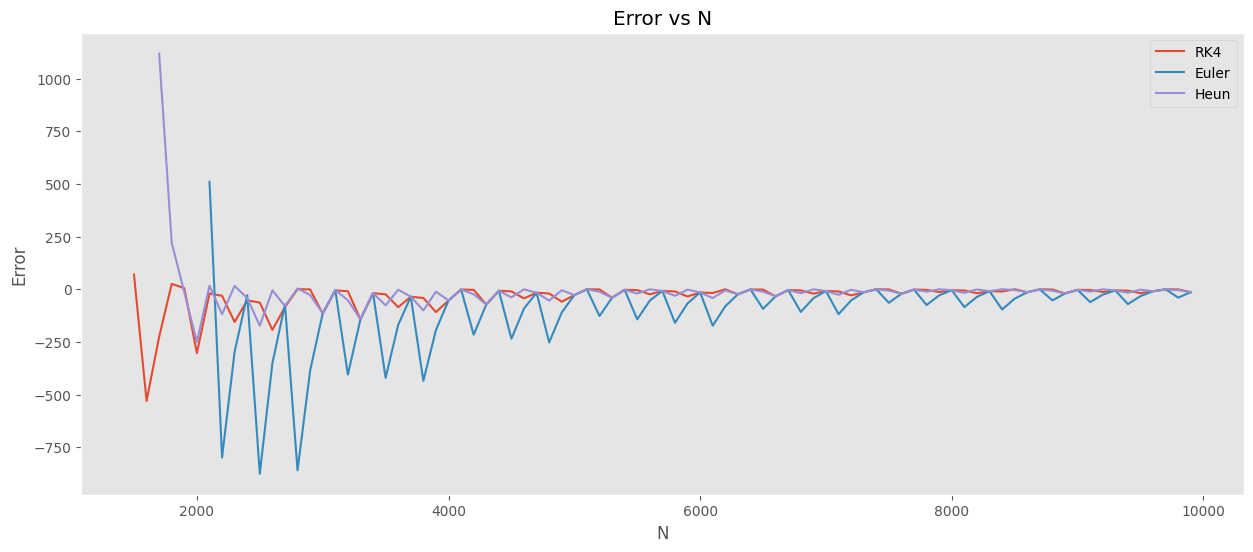

In [ ]:
# This is the total error for rk4 Euler and heun
listN = np.arange(100, 10000, 100)
errorRK4 = np.zeros(len(listN))
errorEuler = np.zeros(len(listN))
errorHeun = np.zeros(len(listN))
for i in range(len(listN)):
    yiRK4 = rk4(x0, derivative, t0, tN, listN[i])
    yiEuler = Euler(x0, t0, tN, derivative, listN[i])
    yiHeun = heun(x0, derivative, t0, tN, listN[i])
    # compute the error between the whole matrices yi and y
    errorRK4[i] = differenceMatricesNormalized(yiRK4, y)
    errorEuler[i] = differenceMatricesNormalized(yiEuler, y)
    errorHeun[i] = differenceMatricesNormalized(yiHeun, y)

# Plotting the error
plt.figure(figsize = (15, 6))
plt.plot(listN, errorRK4, label = "RK4")
plt.plot(listN, errorEuler, label = "Euler")
plt.plot(listN, errorHeun, label = "Heun")
plt.xlabel("N")
plt.ylabel("Error")
plt.title("Error vs N")
plt.legend()
plt.grid()
plt.show()
import warnings
warnings.filterwarnings('ignore')


Nous observons que l'erreur diminue avec la taille du pas, ainsi qu'avec l'ordre de la méthode. Comme prévu, la méthode de Runge-Kutta d'ordre 4 (RK4) est celle qui converge le plus rapidement vers la solution exacte, tandis que la méthode d'Euler est celle qui converge le plus lentement.

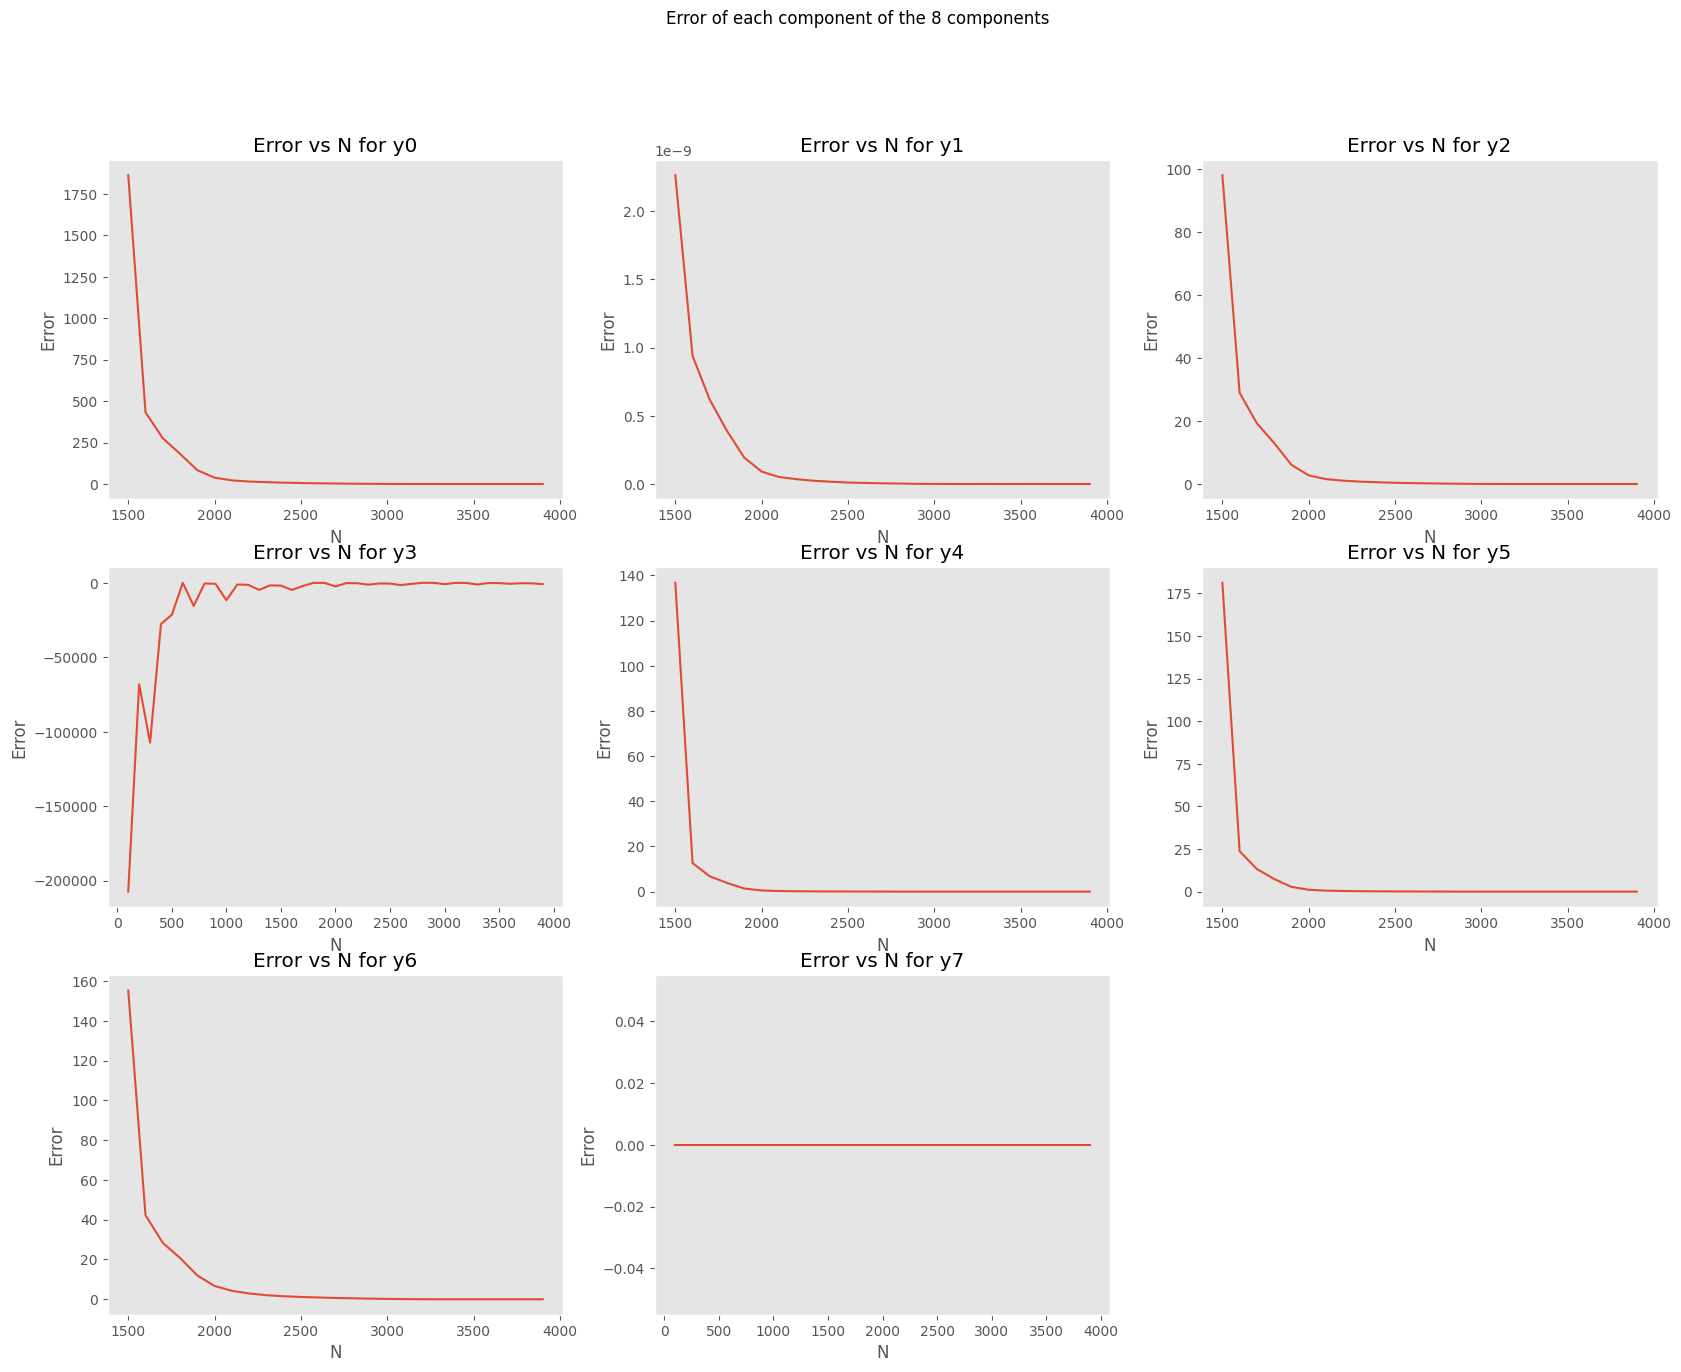

In [ ]:
# This is the error of each parameter for rk4
listN = np.arange(100, 4000, 100)
plt.figure(figsize = (20, 15))
plt.suptitle("Error of each component of the 8 components")
for i in range(8):
    error = np.zeros(len(listN))
    for j in range(len(listN)):
        yi = rk4(x0, derivative, t0, tN, listN[j])
        error[j] = differenceVectorsNormalized(yi[:, i], y[:, i])
    plt.subplot(3, 3, i + 1)
    plt.plot(listN, error)
    plt.xlabel("N")
    plt.ylabel("Error")
    plt.title("Error vs N for y" + str(i))
    plt.grid()

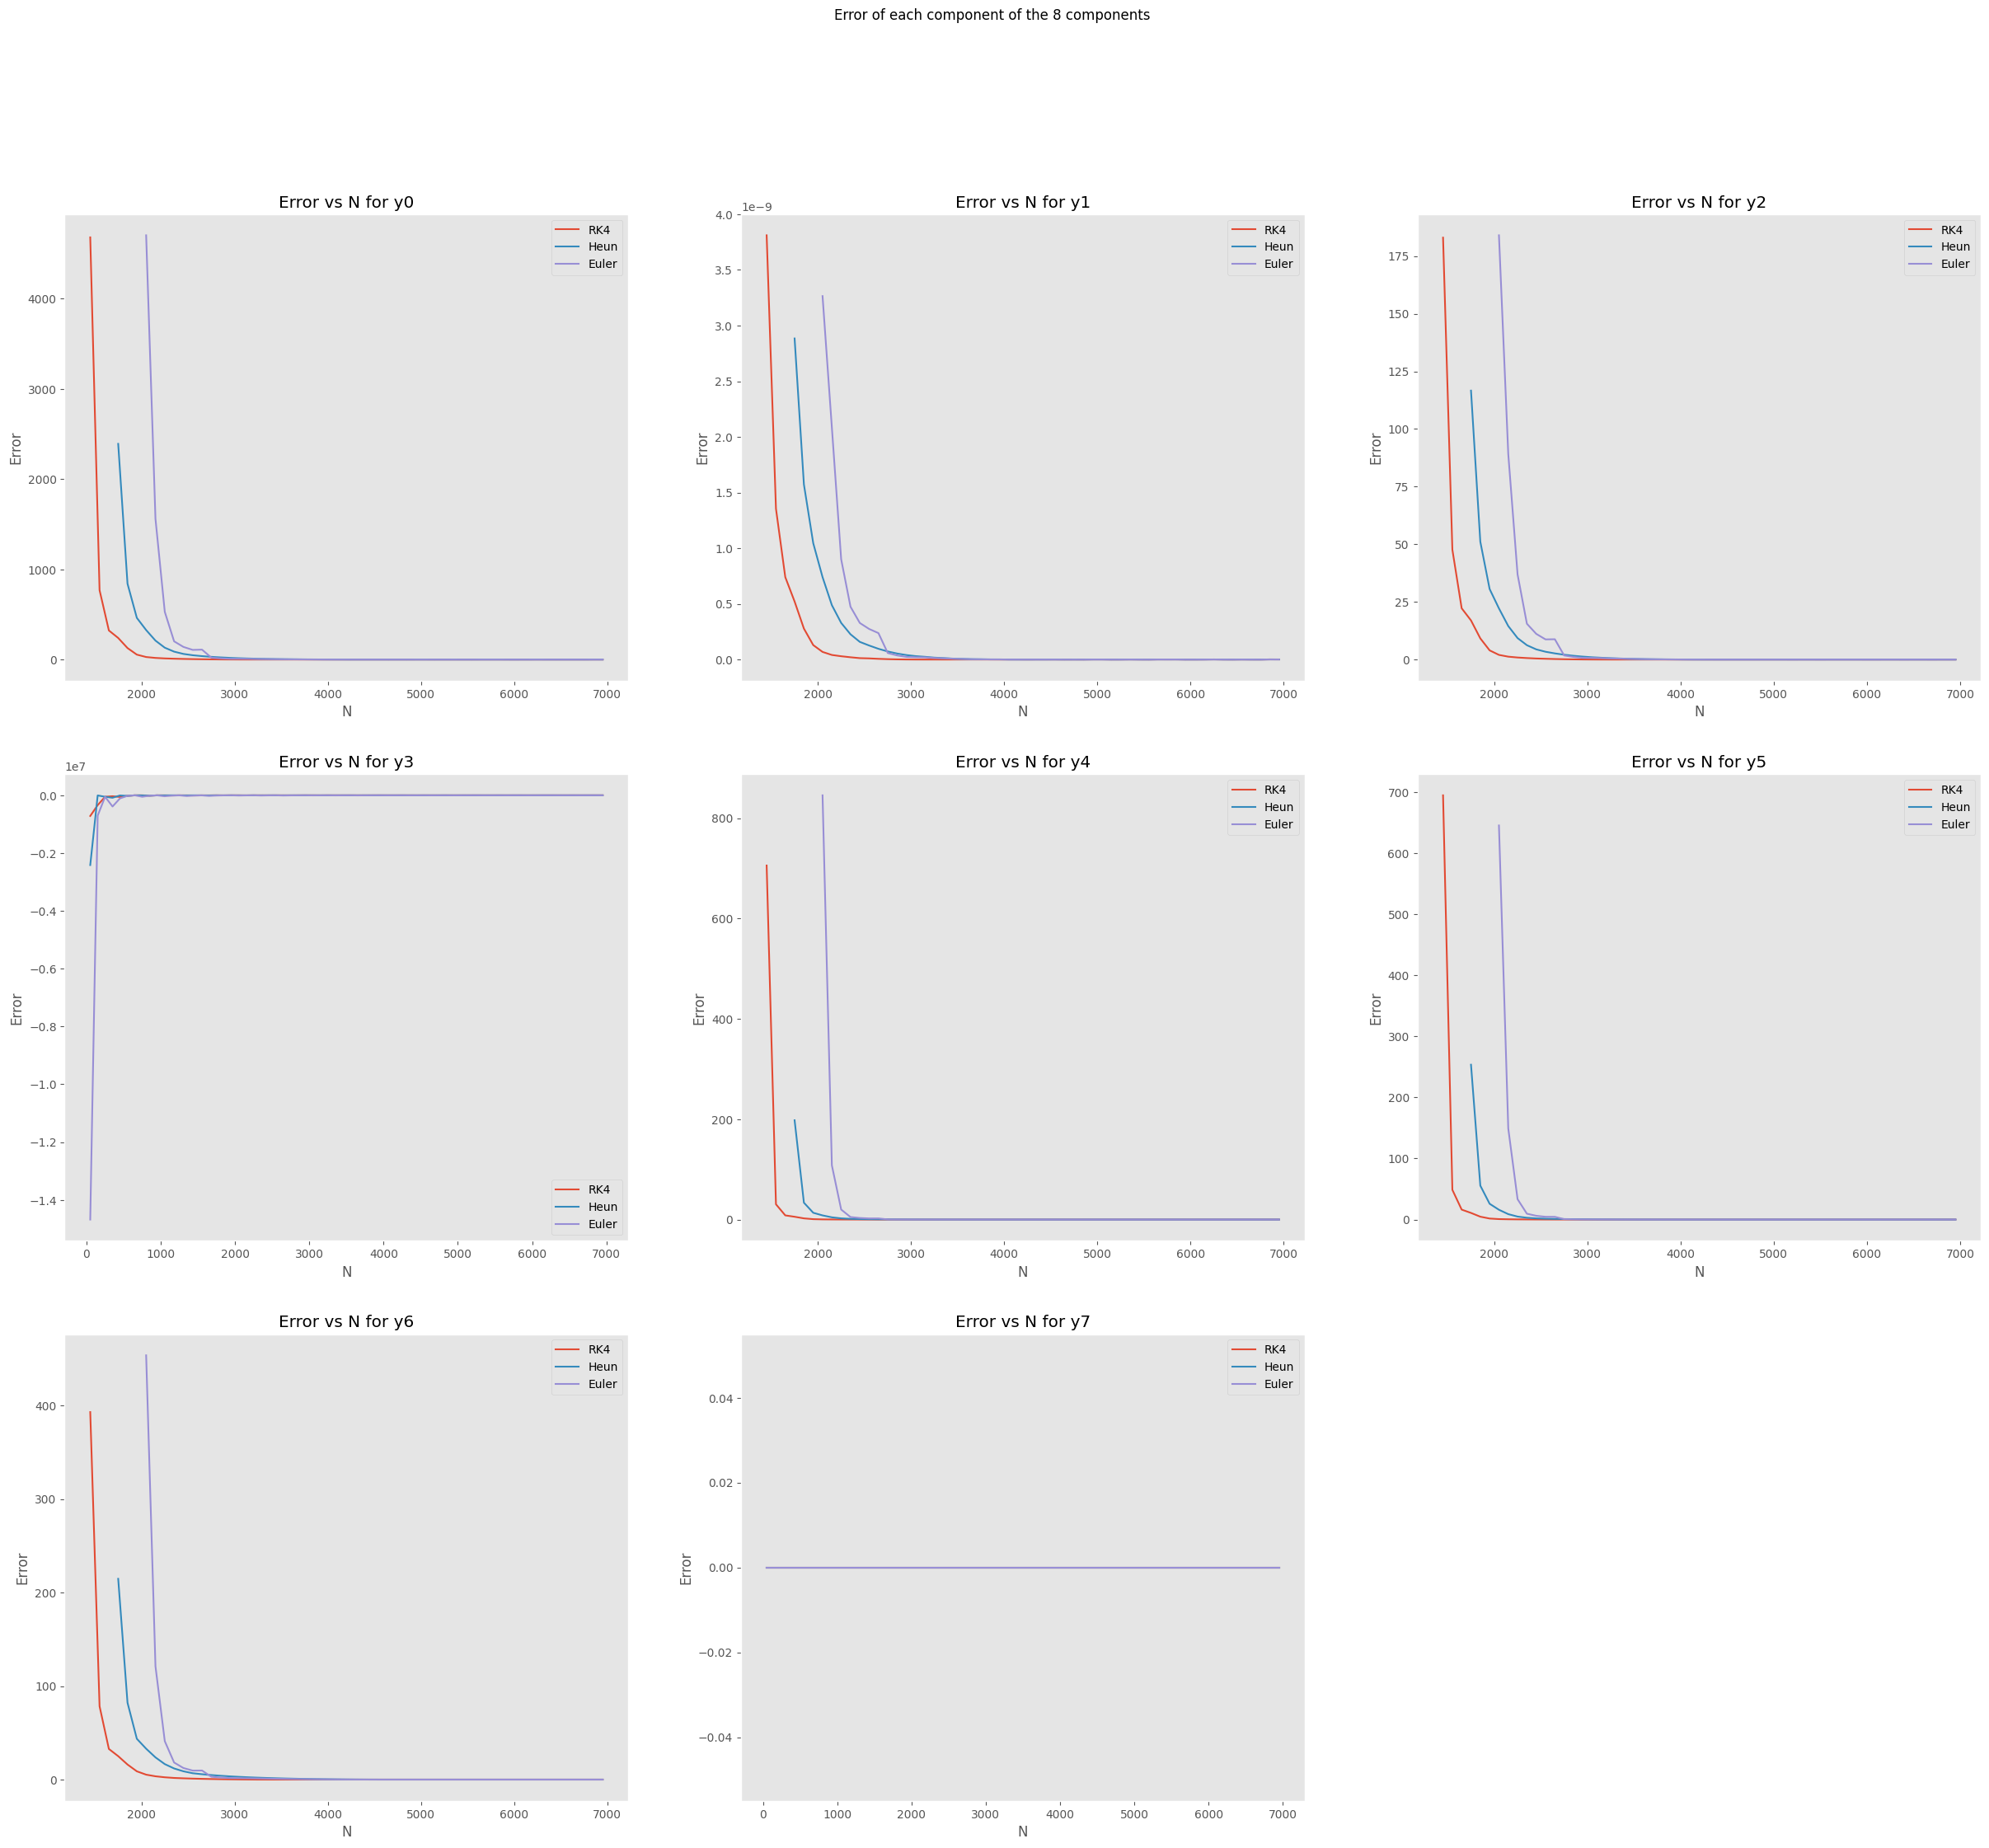

In [ ]:
# this is the error of each parameter for rk4, heun and Euler in one plot
listN = np.arange(50, 7000, 100)
plt.figure(figsize = (30, 25))
plt.suptitle("Error of each component of the 8 components")
for i in range(8):
    errorRK4 = np.zeros(len(listN))
    errorHeun = np.zeros(len(listN))
    errorEuler = np.zeros(len(listN))
    for j in range(len(listN)):
        yiRK4 = rk4(x0, derivative, t0, tN, listN[j])
        yiHeun = heun(x0, derivative, t0, tN, listN[j])
        yiEuler = Euler(x0, t0, tN, derivative,  listN[j])
        errorRK4[j] = differenceVectorsNormalized(yiRK4[:, i], y[:, i])
        errorHeun[j] = differenceVectorsNormalized(yiHeun[:, i], y[:, i])
        errorEuler[j] = differenceVectorsNormalized(yiEuler[:, i], y[:, i])

    plt.subplot(3, 3, i + 1)
    plt.plot(listN, errorRK4, label = "RK4")
    plt.plot(listN, errorHeun, label = "Heun")
    plt.plot(listN, errorEuler, label = "Euler")
    plt.xlabel("N")
    plt.ylabel("Error")
    plt.title("Error vs N for y" + str(i))
    plt.legend()
    plt.grid()

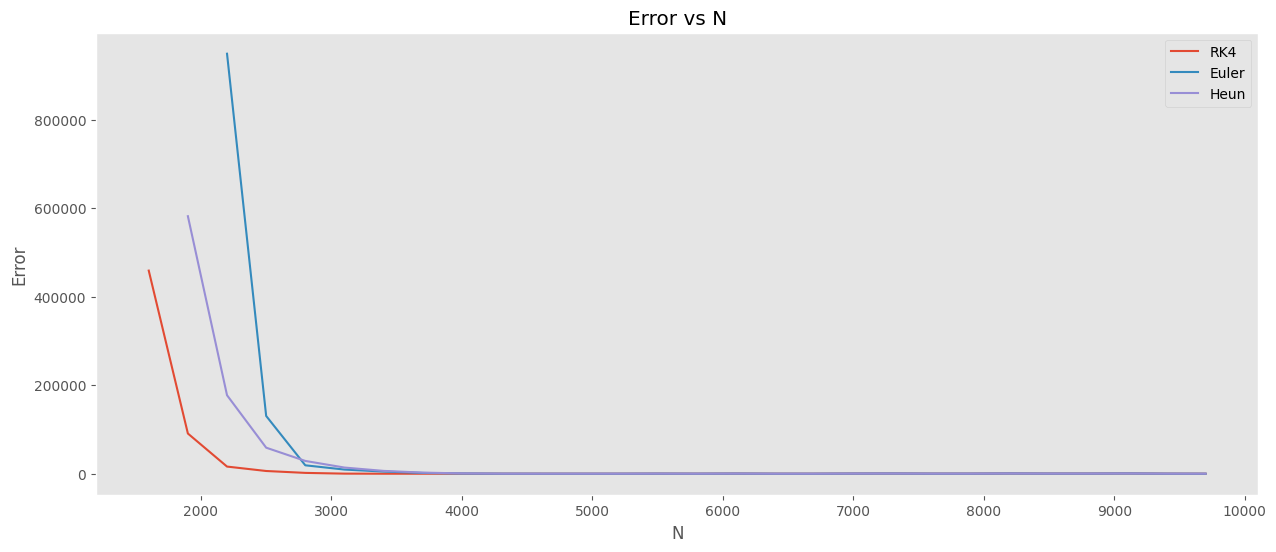

In [ ]:
# we see if something changes with non normalized error
listN = np.arange(100, 10000, 300)
errorRK4 = np.zeros(len(listN))
errorEuler = np.zeros(len(listN))
errorHeun = np.zeros(len(listN))
for i in range(len(listN)):
    yiRK4 = rk4(x0, derivative, t0, tN, listN[i])
    yiEuler = Euler(x0, t0, tN,  derivative, listN[i])
    yiHeun = heun(x0, derivative, t0, tN, listN[i])
    # compute the error between the whole matrices yi and y
    errorRK4[i] = differenceMatrices(yiRK4, y)
    errorEuler[i] = differenceMatrices(yiEuler, y)
    errorHeun[i] = differenceMatrices(yiHeun, y)

# Plotting the error
plt.figure(figsize = (15, 6))
plt.plot(listN, errorRK4, label = "RK4")
plt.plot(listN, errorEuler, label = "Euler")
plt.plot(listN, errorHeun, label = "Heun")
plt.xlabel("N")
plt.ylabel("Error")
plt.title("Error vs N")
plt.legend()
plt.grid()
plt.show()

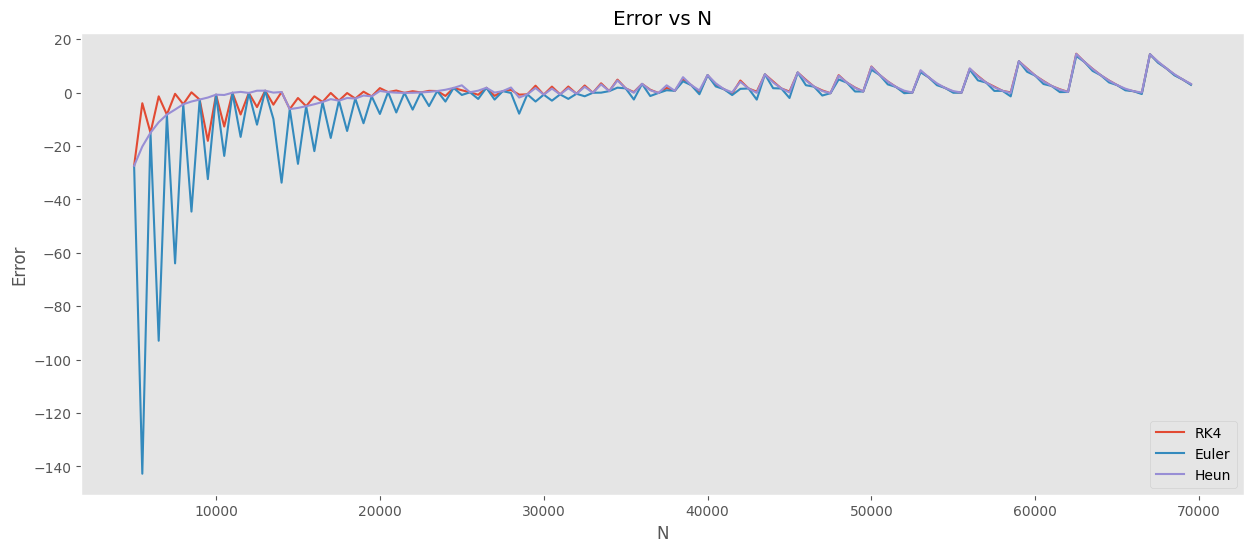

In [ ]:
# we see focus on asymptotic error
listN = np.arange(5000, 70000, 500)
errorRK4 = np.zeros(len(listN))
errorEuler = np.zeros(len(listN))
errorHeun = np.zeros(len(listN))
for i in range(len(listN)):
    yiRK4 = rk4(x0, derivative, t0, tN, listN[i])
    yiEuler = Euler(x0,  t0, tN, derivative, listN[i])
    yiHeun = heun(x0, derivative, t0, tN, listN[i])
    # compute the error between the whole matrices yi and y
    errorRK4[i] = differenceMatricesNormalized(yiRK4, y)
    errorEuler[i] = differenceMatricesNormalized(yiEuler, y)
    errorHeun[i] = differenceMatricesNormalized(yiHeun, y)

# Plotting the error
plt.figure(figsize = (15, 6))
plt.plot(listN, errorRK4, label = "RK4")
plt.plot(listN, errorEuler, label = "Euler")
plt.plot(listN, errorHeun, label = "Heun")
plt.xlabel("N")
plt.ylabel("Error")
plt.title("Error vs N")
plt.legend()
plt.grid()
plt.show()

# Studying the stability of the methods

## Théorème :

Si la fonction $f$ est Lipschitzienne avec une constante $k$, alors la méthode de Runge-Kutta $\phi$ est stable avec une constante $S = s^{\Lambda T}$, où :

$$ \Lambda = k \sum_{j = 1}^{p} |b_j| \left( 1 + (\alpha k h_{\max}) + \dots + (\alpha k h_{\max})^{j - 1} \right) $$


### Expérimentation :

Nous souhaitons vérifier si la fonction $f(t, y)$ est Lipschitzienne par rapport à $y$. Pour cela, nous pouvons tracer :

$$ \frac{\| f(t, y_1) - f(t, y_2) \|}{\| y_1 - y_2 \|} $$

Cependant, cette expression dépend également de la norme choisie. Néanmoins, dans $\mathbb{R}^m$, toutes les normes sont équivalentes, ce qui signifie que si nous établissons que la fonction est Lipschitzienne par rapport à une norme, alors elle le sera également pour toutes les autres normes.

Par simplicité, nous choisissons la norme $\| . \|_{\infty}$.

La fonction que nous allons tracer est donc la suivante :

$$ \psi(h) = \frac{\| f(t, y_1) - f(t, y_1 + h) \|}{\| h \|} $$


In [ ]:
def isLipschitz(f, t, x0):

    H = np.linspace(1, 100000, 100)
    y1 = x0
    valuesinf = []
    values1 = []
    values2 = []
    for h in H:
        y2 = y1 + h * np.ones(8)
        num = np.linalg.norm(f(y1, t) - f(y2, t), np.inf)
        den = np.linalg.norm(y1 - y2, np.inf)
        den1 = np.linalg.norm(y1 - y2, 1)
        den2 = np.linalg.norm(y1 - y2, 2)
        num1 = np.linalg.norm(f(y1, t) - f(y2, t), 1)
        num2 = np.linalg.norm(f(y1, t) - f(y2, t), 2)
        valuesinf.append(num / den)
        values1.append(num1 / den1)
        values2.append(num2 / den2)

    plt.figure(figsize = (15, 6))
    plt.plot(H, valuesinf, label = "norme infinie")
    plt.plot(H, values1, label = "norme 1")
    plt.plot(H, values2, label = "norme 2")
    plt.xlabel("H")
    plt.ylabel("Lipschitz constant")
    plt.title("Lipschitz constant vs H")
    plt.legend()
    plt.grid()
    plt.show()



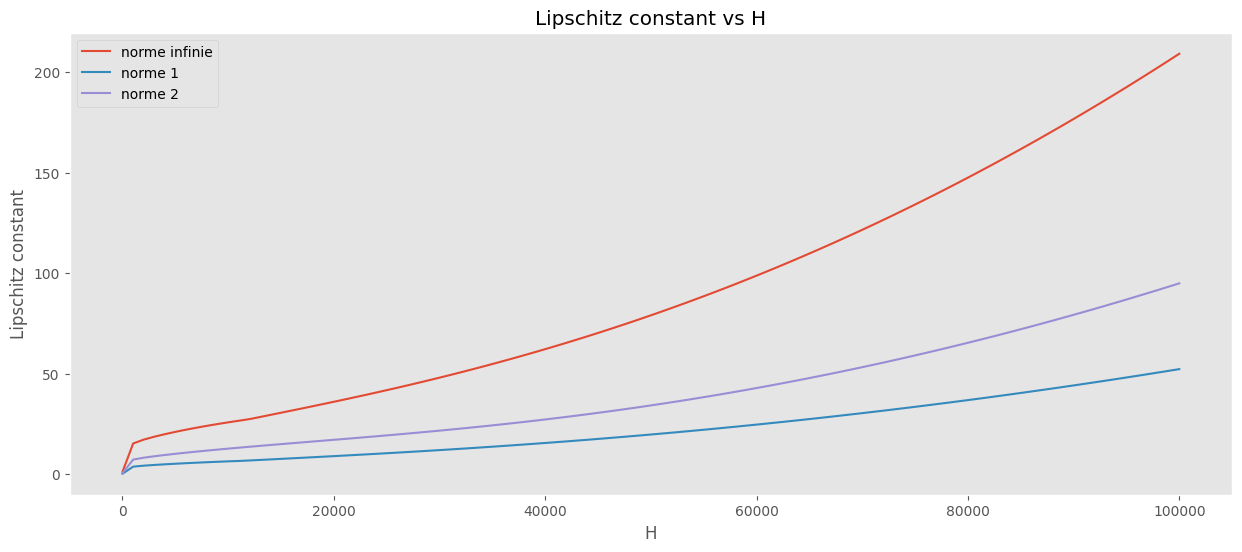

In [ ]:
t = 1
isLipschitz(derivative, t, x0)


### Conclusion sur la stabilité :

La méthode n'est **pas** Lipschitzienne, car la fonction $\psi(h)$ n'est pas bornée pour tout $h \in \mathbb{R}^8$.


À l’issue de notre analyse et des simulations réalisées, les courbes obtenues se superposent parfaitement à celles attendues. Cela suggère que notre modèle, ainsi que les données exploitées, reproduisent fidèlement le comportement du système étudié.

Nous pouvons donc conclure que le réchauffement climatique est bel et bien une réalité.